# Task 2: To Explore Supervised Machine Learning.

Simple Linear Regression

In this regression task we predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple linear regression task as it involves just two variables("Hours","score")

In [31]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#importing aata from link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [33]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Exploratory Data Analysis(EDA)

In [34]:
#Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [35]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [36]:
#shape of the data
data.shape

(25, 2)

In [37]:
#cheching null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [38]:
#correlation matrix
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the above correlation matrix we can see that there is strong positive correlation between varibles.

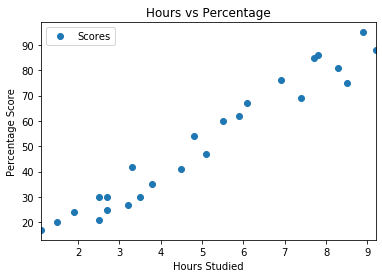

In [39]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

we can see that from the above plot there is positive relationship between varibles("hours","Score).

Preparing the data

In [40]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [41]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [42]:
#fitting the data
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Perentage score')

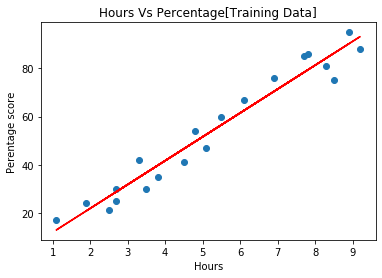

In [43]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title("Hours Vs Percentage[Training Data]")
plt.xlabel("Hours")
plt.ylabel("Perentage score")

Text(0, 0.5, 'Perentage score')

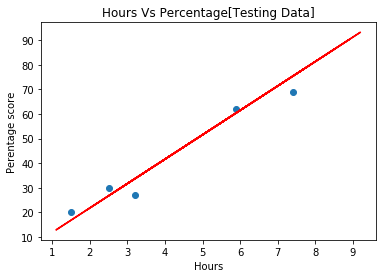

In [44]:
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title("Hours Vs Percentage[Testing Data]")
plt.xlabel("Hours")
plt.ylabel("Perentage score")

In [45]:
y_pred=regressor.predict(X_test)

In [46]:
#Computing Actual vs Predicted
pd.DataFrame({'Actual':y_test,'predicted':y_pred})

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [47]:
#predicting Score if a student studies for 6.30 hours in a day
hours=9
pred=regressor.predict([[hours]])
print(pred)

[91.21406837]


If student studies for 9 hours a day then his/her predicted score is 91.21 percentage.

Evaluating the model

In [48]:
#R-squared value and Mean Absolute Error 
from sklearn import metrics 
print('R-sqaured',metrics.r2_score(y_test,y_pred))
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pred))

R-sqaured 0.9454906892105356
Mean Absolute Error 4.183859899002975
